<a href="https://colab.research.google.com/github/Bittersteel123/AI-Solar-Power-Generation-Predictor/blob/main/Solar_Power_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
url1 ="https://raw.githubusercontent.com/sourabhK577/AI-Solar-Power-Generation-Predictor/refs/heads/main/Plant_1_Generation_Data.csv"
url2="https://raw.githubusercontent.com/Bittersteel123/AI-Solar-Power-Generation-Predictor/refs/heads/main/Plant_1_Weather_Sensor_Data.csv"
df = pd.read_csv(url1)
weather_df = pd.read_csv(url2)

# 2. Convert DATE_TIME columns to proper datetime objects
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# 3. Aggregate AC_POWER by DATE_TIME
plant_generation = df.groupby('DATE_TIME')['AC_POWER'].sum().reset_index()

# 4. Merge the generation and weather data on DATE_TIME
merged_df = pd.merge(plant_generation, weather_df, on='DATE_TIME', how='inner')

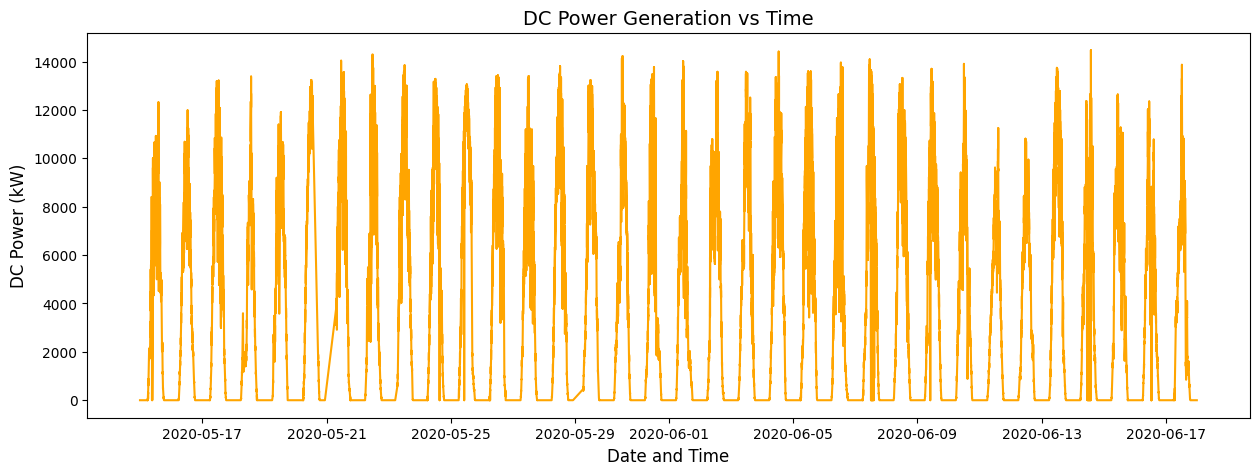

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(df['DATE_TIME'], df['DC_POWER'], color='orange')
plt.title('DC Power Generation vs Time', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('DC Power (kW)', fontsize=12)
plt.show()

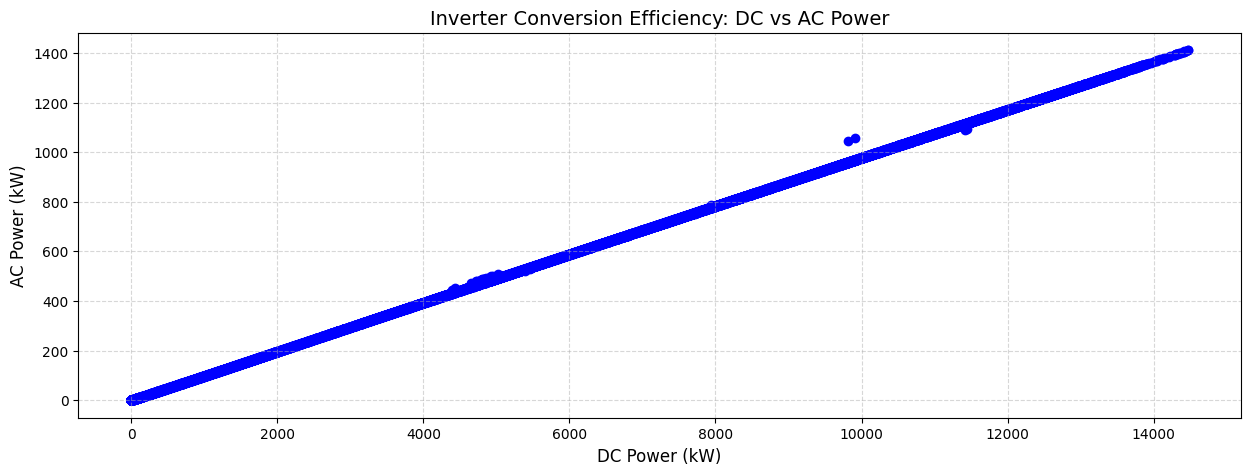

In [23]:
plt.figure(figsize=(15, 5))

plt.scatter(df['DC_POWER'], df['AC_POWER'], color='blue')

plt.title('Inverter Conversion Efficiency: DC vs AC Power', fontsize=14)
plt.xlabel('DC Power (kW)', fontsize=12)
plt.ylabel('AC Power (kW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

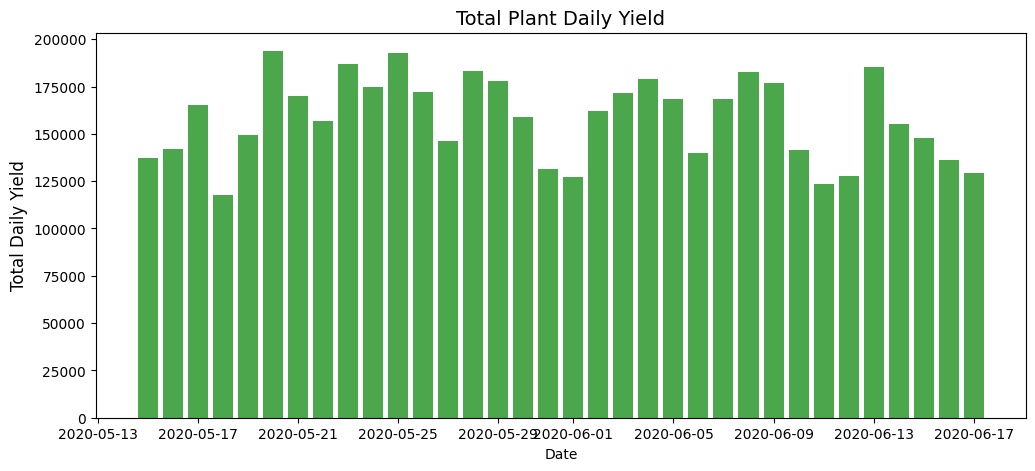

In [26]:
df['DATE'] = df['DATE_TIME'].dt.date
daily_plant_yield = df.groupby(['DATE', 'SOURCE_KEY'])['DAILY_YIELD'].max().groupby('DATE').sum()
plt.figure(figsize=(12, 5))
plt.bar(daily_plant_yield.index, daily_plant_yield.values, color='green', alpha=0.7)
plt.title('Total Plant Daily Yield', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Total Daily Yield', fontsize=12)
plt.show()

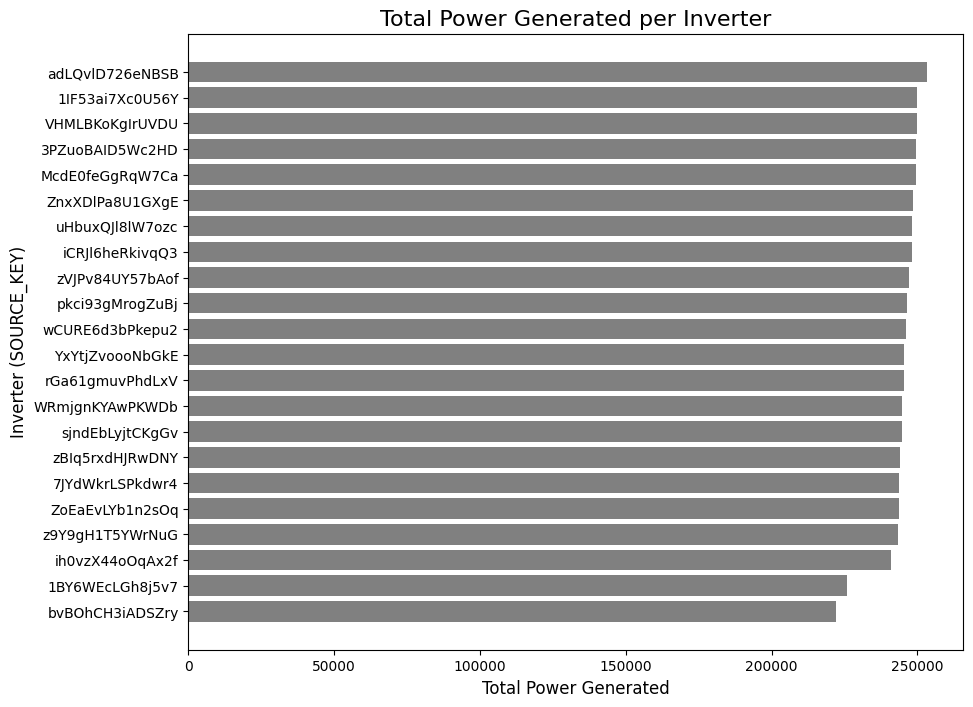

In [25]:
total_power_per_inverter = df.groupby('SOURCE_KEY')['TOTAL_YIELD'].max() - df.groupby('SOURCE_KEY')['TOTAL_YIELD'].min()
total_power_per_inverter = total_power_per_inverter.sort_values(ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(total_power_per_inverter.index, total_power_per_inverter.values, color='gray')
plt.title('Total Power Generated per Inverter', fontsize=16)
plt.ylabel('Inverter (SOURCE_KEY)', fontsize=12)
plt.xlabel('Total Power Generated', fontsize=12)
plt.show()

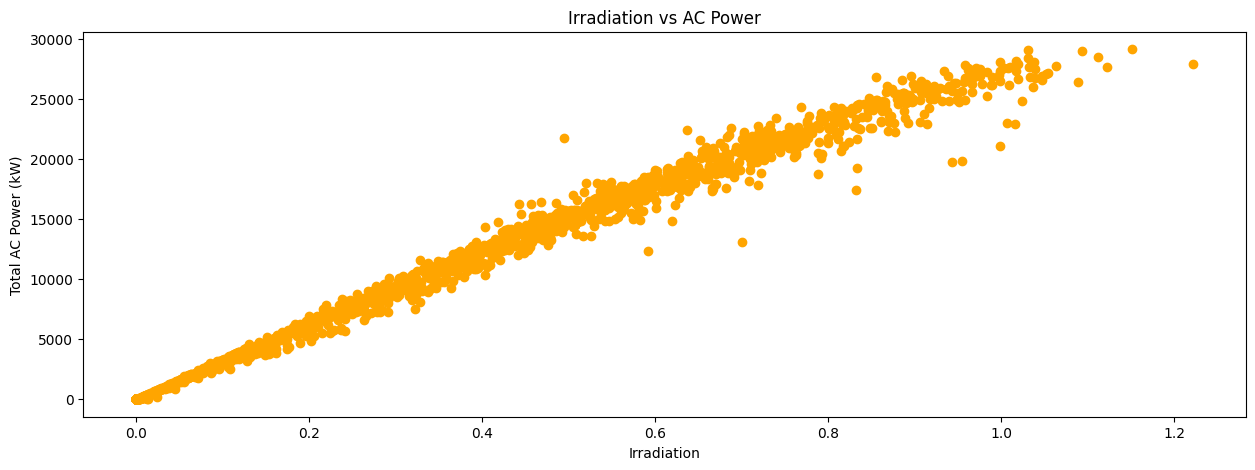

In [34]:
plt.figure(figsize=(15, 5))
plt.scatter(merged_df['IRRADIATION'], merged_df['AC_POWER'], color='orange')
plt.title('Irradiation vs AC Power')
plt.xlabel('Irradiation')
plt.ylabel('Total AC Power (kW)')
plt.show()

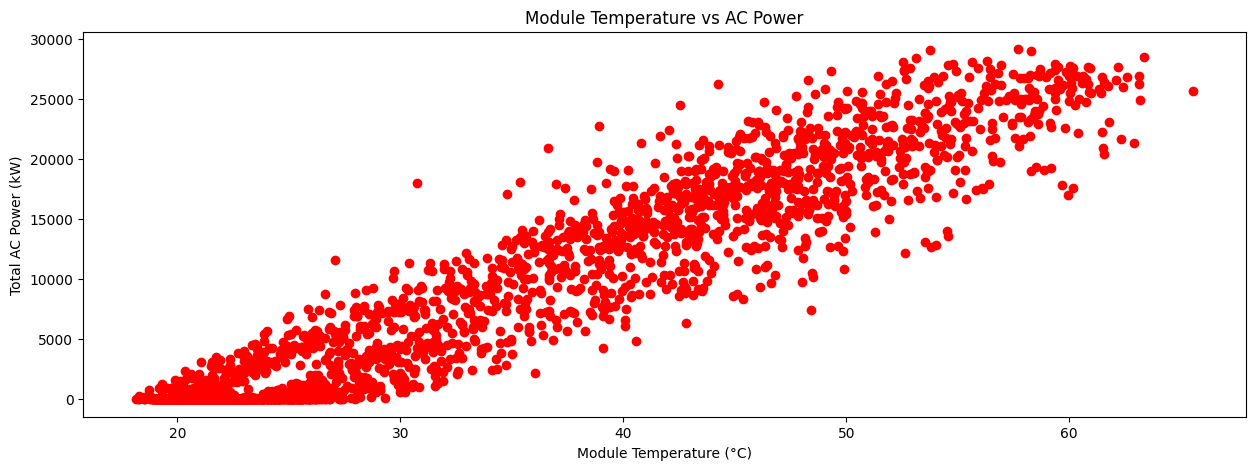

In [35]:
plt.figure(figsize=(15, 5))
plt.scatter(merged_df['MODULE_TEMPERATURE'], merged_df['AC_POWER'], color='red')
plt.title('Module Temperature vs AC Power')
plt.xlabel('Module Temperature (°C)')
plt.ylabel('Total AC Power (kW)')
plt.show()

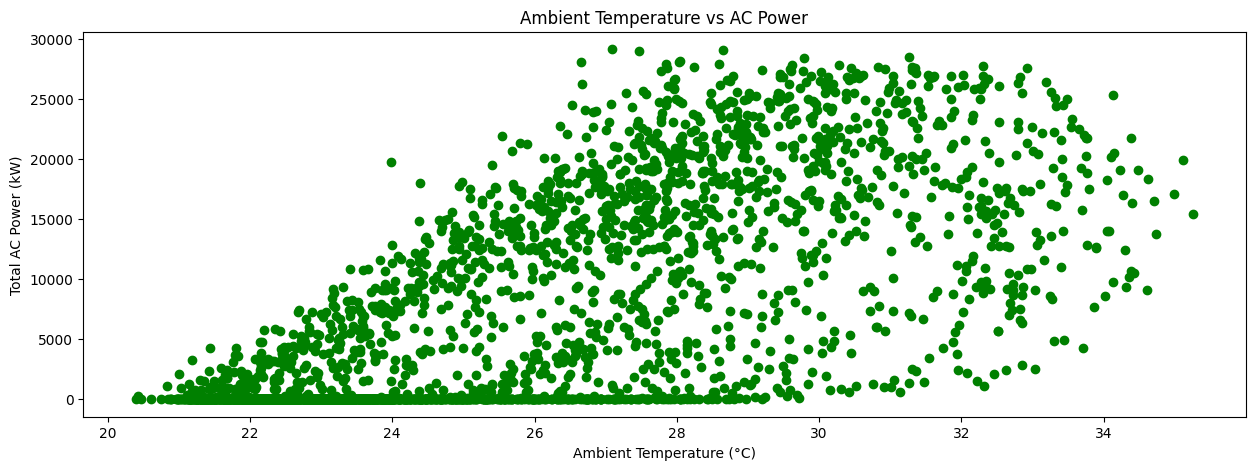

In [36]:
plt.figure(figsize=(15, 5))
plt.scatter(merged_df['AMBIENT_TEMPERATURE'], merged_df['AC_POWER'],color='green')
plt.title('Ambient Temperature vs AC Power')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Total AC Power (kW)')
plt.show()